<h1 style="text-align: center;">
  <b>Seleção de Modelos de Machine Learning em Dados Multivariados e Anonimizados</b>
</h1>

<p style='text-align: justify;'>
  _______________________________________________________________________________________________________
</p>

<h2 style='text-align: justify;'>
  Machine Learning para um Problema de Classificação Supervisionada.
</h2>

<h3 style="text-align: justify;">
  Script desenvolvido para explorar diferentes técnicas de seleção de modelos de Machine Learning para identificar o algoritmo mais eficaz e eficiente, em um ambiente com dados multivariados e anonimizados.
</h3>

<p style='text-align: justify;'>
  Nosso trabalho é construir um modelo de Machine Learning capaz de prever se o cliente de  uma  seguradora  vai  renovar  ou  não  o  seguro  do  carro.  Com  esse  modelo  preditivo  a seguradora pode planejar melhor seu orçamento prevendo antecipadamente a renovação de um determinado cliente a qualquer momento.
</p>

<p style='text-align: justify;'>
  Por motivos de privacidade, não são fornecidas informações sobre a fonte de dados nem sobre os nomes das 178 variáveis descritivas que representam as caracteristicas dos clientes. Não  é  possível  identificar  o  que  cada  característica representa  e  os dados tratados nesse projeto já estão anonimizados.  A  variável  179  é  a variável target,  ela indica se o cliente renovou ou não o seguro nos 2 anos anteriores.
</p>

<p style='text-align: justify;'>
  Neste projeto, dividimos as análises em duas partes contidas em dois scripts python: a parte 1 trata do pré-processamento dos dados e a parte 2 trata da modelagem.
</p>

<p style='text-align: justify;'>
  _______________________________________________________________________________________________________
</p>

<h2 style='text-align: justify;'>
  Parte 2: Modelagem
</h2>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [1]:
# Imports
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michela Camboim" 

Author: Michela Camboim



<p style='text-align: justify;'>
  ________________________________________
</p>

<h4 style='text-align: justify;'>
  Carregando os Dados Pré-Processados
</h4>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [3]:
# Carregando o dataset de treino
df_treino = pd.read_csv('dados/dados_treino.csv')

# Carregando o dataset de treino final
df_treino_final = pd.read_csv('dados/dados_treino_final.csv')

# Carregando o dataset de validação
df_valid = pd.read_csv('dados/dados_valid.csv')

# Carregando o dataset de teste
df_teste = pd.read_csv('dados/dados_teste.csv')

df_treino

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
0,-94,-106,-116,-114,-94,-65,-39,-15,1,10,...,-30,-26,-25,-36,-59,-78,-100,-118,-124,0
1,-340,-381,-376,-336,-275,-204,-131,-70,-16,20,...,114,-39,-185,-293,-351,-379,-380,-350,-308,1
2,-98,-89,-73,-62,-46,-33,-51,-66,-78,-59,...,60,18,3,-6,-20,-50,-70,-65,-48,0
3,-50,-55,-50,-49,-46,-48,-41,-45,-52,-60,...,-32,-32,-36,-33,-27,-19,-11,-8,-6,0
4,11,-30,-66,-99,-108,-100,-89,-88,-94,-95,...,-98,-90,-68,-52,-45,-50,-59,-57,-35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,110,83,75,79,87,89,53,31,-13,-32,...,33,50,66,63,54,46,42,46,52,0
8046,2,-15,-11,19,30,53,25,-4,-28,-47,...,30,26,11,16,-5,-11,-23,-17,-11,0
8047,17,-24,-61,-81,-84,-72,-69,-60,-55,-40,...,-4,20,38,40,6,-55,-99,-99,-47,0
8048,-2,2,13,51,76,97,70,40,17,1,...,34,25,22,13,11,8,15,24,9,0


In [4]:
# Carregando os nomes das colunas de entrada
with open('dados/colunas_entrada.sav', 'rb') as file:
    colunas_entrada = pickle.load(file)

<p style='text-align: justify;'>
  ________________________________________
</p>

<h4 style='text-align: justify;'>
  Preparando as Matrizes X e y
</h4>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [5]:
# Prepara a Matriz X
X_treino = df_treino_final[colunas_entrada].values
X_valid = df_valid[colunas_entrada].values
X_teste = df_teste[colunas_entrada].values

X_treino

array([[  23,   31,   33, ...,  -86,  -66,  -41],
       [-109, -113, -119, ...,   17,    7,   -5],
       [ -75,  -80,  -83, ..., -153, -172, -178],
       ...,
       [-173, -162, -140, ..., -327, -357, -427],
       [ -16,   -8,   -1, ...,  -84,  -66,  -56],
       [  -5,  -29,  -49, ...,  -97, -106, -102]], dtype=int64)

In [6]:
# Prepara a Matriz Y
y_treino = df_treino_final['LABEL_TARGET'].values
y_valid = df_valid['LABEL_TARGET'].values
y_teste = df_teste['LABEL_TARGET'].values

y_treino

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação:', X_valid.shape, y_valid.shape)
print('Shape dos dados de teste:', X_teste.shape, y_teste.shape)

Shape dos dados de treino: (3212, 178) (3212,)
Shape dos dados de validação: (1725, 178) (1725,)
Shape dos dados de teste: (1725, 178) (1725,)


In [8]:
type(X_treino)

numpy.ndarray

<p style='text-align: justify;'>
  ________________________________________
</p>

<h4 style='text-align: justify;'>
  Padronização dos Dados
</h4>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [9]:
# Crio o objeto
scaler = StandardScaler()

# Faço o fit
scaler.fit(X_treino)

# Salva o objeto em disco e carrega para usarmos adiante no teste
scalerfile = 'dados/scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# Carrega o scaler (padronizador)
scaler = pickle.load(open(scalerfile, 'rb'))

# Aplica a padronização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [10]:
X_treino_tf

array([[ 0.17076949,  0.19186469,  0.19212115, ..., -0.28984026,
        -0.20964702, -0.10029964],
       [-0.35919342, -0.38388249, -0.42554902, ...,  0.13391934,
         0.09138789,  0.04476594],
       [-0.22268782, -0.25194043, -0.27925872, ..., -0.56548971,
        -0.6467662 , -0.65235477],
       ...,
       [-0.61614514, -0.57979647, -0.51088504, ..., -1.28135545,
        -1.40966289, -1.65572504],
       [ 0.01418954,  0.03593316,  0.05395809, ..., -0.28161192,
        -0.20964702, -0.16074363],
       [ 0.05835312, -0.04802997, -0.14109565, ..., -0.33509614,
        -0.37459765, -0.34610521]])

<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Modelagem Preditiva
</h2>



<p style="text-align: justify;">____________________________________________________________</p>

<h2 style="text-align: justify;">Funções Auxiliares: Cálculo da Especificidade</h2>

<p style="text-align: justify;">A especificidade é uma métrica usada para avaliar o desempenho de um modelo de classificação, especialmente em problemas de classificação binária. Ela mede a proporção de verdadeiros negativos (TN) em relação ao total de negativos reais, ou seja, a capacidade do modelo de identificar corretamente as instâncias negativas.</p>

<p style="text-align: justify;">Aqui está o que cada parte da função significa:</p>
 
<p style="text-align: justify;"> <b>y_pred < thresh</b>: Esta é uma condição que verifica se a previsão do modelo (y_pred) é menor que um determinado limiar (thresh). Se o modelo for de classificação binária, esse limiar geralmente é 0.5, mas pode ser ajustado de acordo com as necessidades específicas do problema. Essa condição retorna um vetor booleano, onde cada elemento é True se a previsão for menor que o limiar (indicando uma previsão de classe negativa) e False caso contrário.</p>   

<p style="text-align: justify;"> <b>y_actual == 0</b>: Esta é uma condição que verifica quais elementos do vetor de rótulos reais (y_actual) são iguais a 0, ou seja, pertencem à classe negativa. Isso também retorna um vetor booleano.</p>  

<p style="text-align: justify;"> <b>(y_pred < thresh) & (y_actual == 0)</b>: Este é o operador lógico "e" aplicado entre os dois vetores booleanos anteriores. Ele retorna um novo vetor booleano, onde cada elemento é True apenas se ambas as condições forem verdadeiras para esse elemento, ou seja, se a previsão for negativa e o rótulo real também for negativo. Isso representa os verdadeiros negativos (TN).</p>  

<p style="text-align: justify;"> <b>sum((y_pred < thresh) & (y_actual == 0))</b>: Esta é a soma dos valores True no vetor booleano resultante, que é equivalente ao número de verdadeiros negativos (TN).</p>  

<p style="text-align: justify;"> <b>sum(y_actual == 0)</b>: Esta é a soma dos valores True no vetor booleano que representa os rótulos reais negativos, que é equivalente ao número total de instâncias negativas reais (TN + FP).</p>  

<p style="text-align: justify;"> <b>sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)</b>: Esta é a razão entre o número de verdadeiros negativos (TN) e o número total de instâncias negativas reais (TN + FP), que é a definição de especificidade.</p>  

<p style="text-align: justify;">____________________________________________________________</p>


In [11]:
# Função para calcular a especificidade
def calcula_especificidade(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

In [12]:
# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calcula_especificidade(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    
    return auc, accuracy, recall, precision, specificity 

In [13]:
thresh = 0.5

<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Modelo 1: Regressão Logística (Sem Otimização de Hiperparâmetros).
</h2>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [14]:
# Construção do modelo

# Cria o classificador (objeto)
lr1 = LogisticRegression()

# Treina e cria o modelo
modelo_v1 = lr1.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = modelo_v1.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v1.predict_proba(X_valid_tf)[:,1]

print('Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr1_train_auc, lr1_train_accuracy, lr1_train_recall, lr1_train_precision, lr1_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr1_valid_auc, lr1_valid_accuracy, lr1_valid_recall, lr1_valid_precision, lr1_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)

Treinamento:

AUC:0.621
Acurácia:0.660
Recall:0.530
Precisão:0.717
Especificidade:0.791
 
Validação:

AUC:0.531
Acurácia:0.700
Recall:0.450
Precisão:0.334
Especificidade:0.765
 


<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Modelo 2: Regressão Logística (Com Otimização de Hiperparâmetros).
</h2>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [15]:
# Construção do modelo

# Cria o classificador (objeto)
lr2 = LogisticRegression(random_state = 142, solver = 'liblinear')

# Treina e cria o modelo
modelo_v2 = lr2.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = modelo_v2.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v2.predict_proba(X_valid_tf)[:,1]

print('Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr2_train_auc, lr2_train_accuracy, lr2_train_recall, lr2_train_precision, lr2_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr2_valid_auc, lr2_valid_accuracy, lr2_valid_recall, lr2_valid_precision, lr2_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)

Treinamento:

AUC:0.624
Acurácia:0.659
Recall:0.528
Precisão:0.716
Especificidade:0.791
 
Validação:

AUC:0.532
Acurácia:0.705
Recall:0.455
Precisão:0.342
Especificidade:0.770
 


<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Modelo 3: Naive Bayes
</h2>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [16]:
# Construção do modelo

# Cria o classificador (objeto)
nb = GaussianNB()

# Treina e cria o modelo
modelo_v3 = nb.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v3.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v3.predict_proba(X_valid_tf)[:,1]

print('Modelo Naive Bayes:\n')

print('Treinamento:\n')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = print_report(y_treino, 
                                                                                                              y_train_preds, 
                                                                                                              thresh)

print('Validação:\n')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid, 
                                                                                                              y_valid_preds, 
                                                                                                              thresh)


Modelo Naive Bayes:

Treinamento:

AUC:0.983
Acurácia:0.926
Recall:0.878
Precisão:0.972
Especificidade:0.974
 
Validação:

AUC:0.981
Acurácia:0.948
Recall:0.863
Precisão:0.885
Especificidade:0.971
 


<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Modelo 4: XGBoost (Xtreme Gradient Boosting Classifier).
</h2>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [17]:
# Construção do modelo (Ensemble)

# Cria o classificador
xgbc = XGBClassifier()

# Treina e cria o modelo
modelo_v4 = xgbc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v4.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v4.predict_proba(X_valid_tf)[:,1]

print('Modelo Xtreme Gradient Boosting Classifier:\n')

print('Treinamento:\n')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(y_treino, 
                                                                                                                        y_train_preds, 
                                                                                                                        thresh)

print('Validação:\n')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(y_valid, 
                                                                                                                        y_valid_preds, 
                                                                                                                        thresh)


Modelo Xtreme Gradient Boosting Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.992
Acurácia:0.955
Recall:0.947
Precisão:0.852
Especificidade:0.957
 


<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Modelo 5: RandomForest.
</h2>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [18]:
# Cria o classificador com RandomForest
rfc = RandomForestClassifier()

# Treina e cria o modelo
modelo_v5 = rfc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v5.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v5.predict_proba(X_valid_tf)[:,1]

print('Modelo Random Forest Classifier:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Modelo Random Forest Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.992
Acurácia:0.943
Recall:0.980
Precisão:0.794
Especificidade:0.931
 


<p style='text-align: justify;'>
  ________________________________________
</p>

<h4 style='text-align: justify;'>
  Seleção de Modelos
</h4>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [19]:
# Tabela de resultados
df_results = pd.DataFrame({'classificador':['RL1', 'RL1', 'RL2', 'RL2', 'NB', 'NB', 'XGB', 'XGB', 'RFC', 'RFC'],
                           'data_set':['treino','valid'] * 5,
                           'auc':[lr1_train_auc,
                                  lr1_valid_auc,
                                  lr2_train_auc,
                                  lr2_valid_auc,
                                  nb_train_auc,
                                  nb_valid_auc,
                                  xgbc_train_auc,
                                  xgbc_valid_auc,
                                  rfc_train_auc,
                                  rfc_valid_auc],
                           'accuracy':[lr1_train_accuracy,
                                       lr1_valid_accuracy,
                                       lr2_train_accuracy,
                                       lr2_valid_accuracy,
                                       nb_train_accuracy,
                                       nb_valid_accuracy,
                                       xgbc_train_accuracy,
                                       xgbc_valid_accuracy,
                                       rfc_train_accuracy,
                                       rfc_valid_accuracy],
                           'recall':[lr1_train_recall,
                                     lr1_valid_recall,
                                     lr2_train_recall,
                                     lr2_valid_recall,
                                     nb_train_recall,
                                     nb_valid_recall,
                                     xgbc_train_recall,
                                     xgbc_valid_recall,
                                     rfc_train_recall,
                                     rfc_valid_recall],
                           'precision':[lr1_train_precision,
                                        lr1_valid_precision,
                                        lr2_train_precision,
                                        lr2_valid_precision,
                                        nb_train_precision,
                                        nb_valid_precision,
                                        xgbc_train_precision,
                                        xgbc_valid_precision,
                                        rfc_train_precision,
                                        rfc_valid_precision],
                           'specificity':[lr1_train_specificity,
                                          lr1_valid_specificity,
                                          lr2_train_specificity,
                                          lr2_valid_specificity,
                                          nb_train_specificity,
                                          nb_valid_specificity,
                                          xgbc_train_specificity,
                                          xgbc_valid_specificity,
                                          rfc_train_specificity,
                                          rfc_valid_specificity]})

In [20]:
# Resultados
df_results

,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL1,treino,0.620987,0.660336,0.529888,0.716933,0.790785
1,RL1,valid,0.531155,0.699710,0.449721,0.334025,0.765179
2,RL2,treino,0.623851,0.659402,0.528020,0.716216,0.790785
3,RL2,valid,0.532108,0.704928,0.455307,0.341719,0.770300
4,NB,treino,0.983444,0.926214,0.877958,0.971744,0.974471
5,NB,valid,0.980900,0.948406,0.863128,0.885387,0.970739
6,XGB,treino,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB,valid,0.991818,0.954783,0.946927,0.851759,0.956840
8,RFC,treino,1.000000,1.000000,1.000000,1.000000,1.000000
9,RFC,valid,0.992053,0.943188,0.980447,0.794118,0.930505


In [21]:
# Resultados em validação com ordenação pelo AUC
df_results[df_results['data_set'] == 'valid'].sort_values(by = 'auc', ascending = False)

,classificador,data_set,auc,accuracy,recall,precision,specificity
9,RFC,valid,0.992053,0.943188,0.980447,0.794118,0.930505
7,XGB,valid,0.991818,0.954783,0.946927,0.851759,0.956840
5,NB,valid,0.980900,0.948406,0.863128,0.885387,0.970739
3,RL2,valid,0.532108,0.704928,0.455307,0.341719,0.770300
1,RL1,valid,0.531155,0.699710,0.449721,0.334025,0.765179


<p style='text-align: justify;'>
  ________________________________________
</p>

<p style='text-align: justify;'>
  A métrica de desempenho escolhida será a pontuação AUC (AUC Score) do conjunto de validação. É a pontuaão mais comum usada para comparar modelos de algoritmos diferentes.
</p>

<p style='text-align: justify;'>
  ________________________________________
</p>

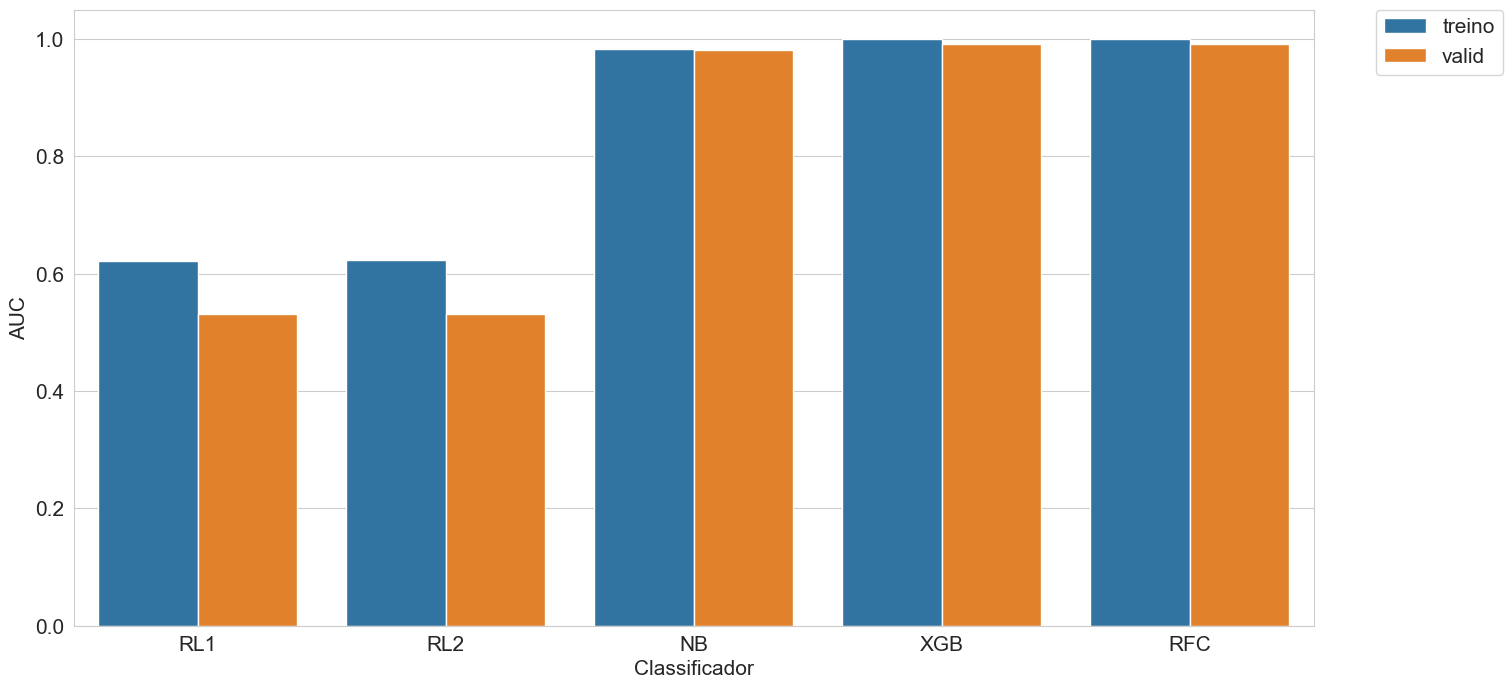

In [22]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Otimização de Hiperparâmetros e Validação Cruzada
</h2>

<p style='text-align: justify;'>
  Será que é possível melhorar a performance do melhor modelo? 
</p>

<p style='text-align: justify;'>
Para incluir a otimização de hiperparâmetros e a validação cruzada no projeto, optou-se pelo uso do GridSearchCV do Scikit-Learn, que permite buscar a melhor combinação de hiperparâmetros para o modelo. Utilizaremos o RandomForest como modelo base.
</p>

<p style='text-align: justify;'>
  ________________________________________
</p>

In [23]:
%%time

# Importa a função GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defina o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cria o classificador com RandomForest
classificador = RandomForestClassifier()

# Configura o GridSearchCV
grid_search = GridSearchCV(estimator = classificador, 
                           param_grid = param_grid, 
                           cv = 5, 
                           scoring = 'roc_auc', 
                           verbose = 2, 
                           n_jobs = -1)

# Treina o modelo com validação cruzada e busca pelos melhores hiperparâmetros
modelo_v5_otimizado = grid_search.fit(X_treino_tf, y_treino)

# Melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:', modelo_v5_otimizado.best_params_)

# Previsões
y_train_preds = modelo_v5_otimizado.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v5_otimizado.predict_proba(X_valid_tf)[:,1]

print('Modelo Random Forest Classifier com Otimização de Hiperparâmetros e Validação Cruzada:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Modelo Random Forest Classifier com Otimização de Hiperparâmetros e Validação Cruzada:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.992
Acurácia:0.941
Recall:0.980
Precisão:0.789
Especificidade:0.931
 
CPU times: total: 9.84 s
Wall time: 10min 34s


<p style='text-align: justify;'>
  ________________________________________
</p>

Modelo RandomForest "Vanilla":

Validação:

- AUC: 0.992
- Acurácia: 0.943
- Recall: 0.980
- Precisão: 0.794
- Especificidade: 0.931
 

Modelo RandomForest Otimizado:

Validação:

- AUC: 0.992
- Acurácia: 0.941
- Recall: 0.980
- Precisão: 0.789
- Especificidade: 0.931

Ambos os modelos com RandomForest apresentam desempenho muito alto e idêntico na AUC. Porém, as demais métricas do modelo otimizado apresentaram resultados ligeiramente piores. Além do mais, o tempo de processamento para treinamento do modelo otimizado foi muito maior.

Decisão: Para este exercício, usaremos o modelo RandomForest sem otimização de hiperparâmetros pois é mais simples e requer menos tempo de treinamento.


<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Salvando o Melhor Modelo
</h2>

<p style='text-align: justify;'>
  ________________________________________

In [24]:
# Grava o modelo em disco
pickle.dump(modelo_v5, open('modelos/melhor_modelo.pkl', 'wb'), protocol = 4)

<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Avaliando o Desempenho do Modelo
</h2>

<p style='text-align: justify;'>
  ________________________________________

In [25]:
# Carrega o modelo, as colunas e o scaler
best_model = pickle.load(open('modelos/melhor_modelo.pkl','rb'))
cols_input = pickle.load(open('dados/colunas_entrada.sav','rb'))
scaler = pickle.load(open('dados/scaler.sav', 'rb'))

# Carrega os dados
df_train = pd.read_csv('dados/dados_treino_final.csv')
df_valid = pd.read_csv('dados/dados_valid.csv')
df_test = pd.read_csv('dados/dados_teste.csv')

# Cria matrizes x e y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['LABEL_TARGET'].values
y_valid = df_valid['LABEL_TARGET'].values
y_test = df_test['LABEL_TARGET'].values

# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [26]:
X_train_tf[:,1]

array([ 0.19186469, -0.38388249, -0.25194043, ..., -0.57979647,
        0.03593316, -0.04802997])

In [27]:
# Previsões de probabilidade
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [28]:
thresh = 0.5

print('\nTreinamento:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,
                                                                                               y_train_preds, 
                                                                                               thresh)

print('\nValidação:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,
                                                                                               y_valid_preds, 
                                                                                               thresh)

print('\nTeste:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,
                                                                                          y_test_preds, 
                                                                                          thresh)


Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 

Validação:

AUC:0.992
Acurácia:0.943
Recall:0.980
Precisão:0.794
Especificidade:0.931
 

Teste:

AUC:0.993
Acurácia:0.950
Recall:0.973
Precisão:0.807
Especificidade:0.942
 


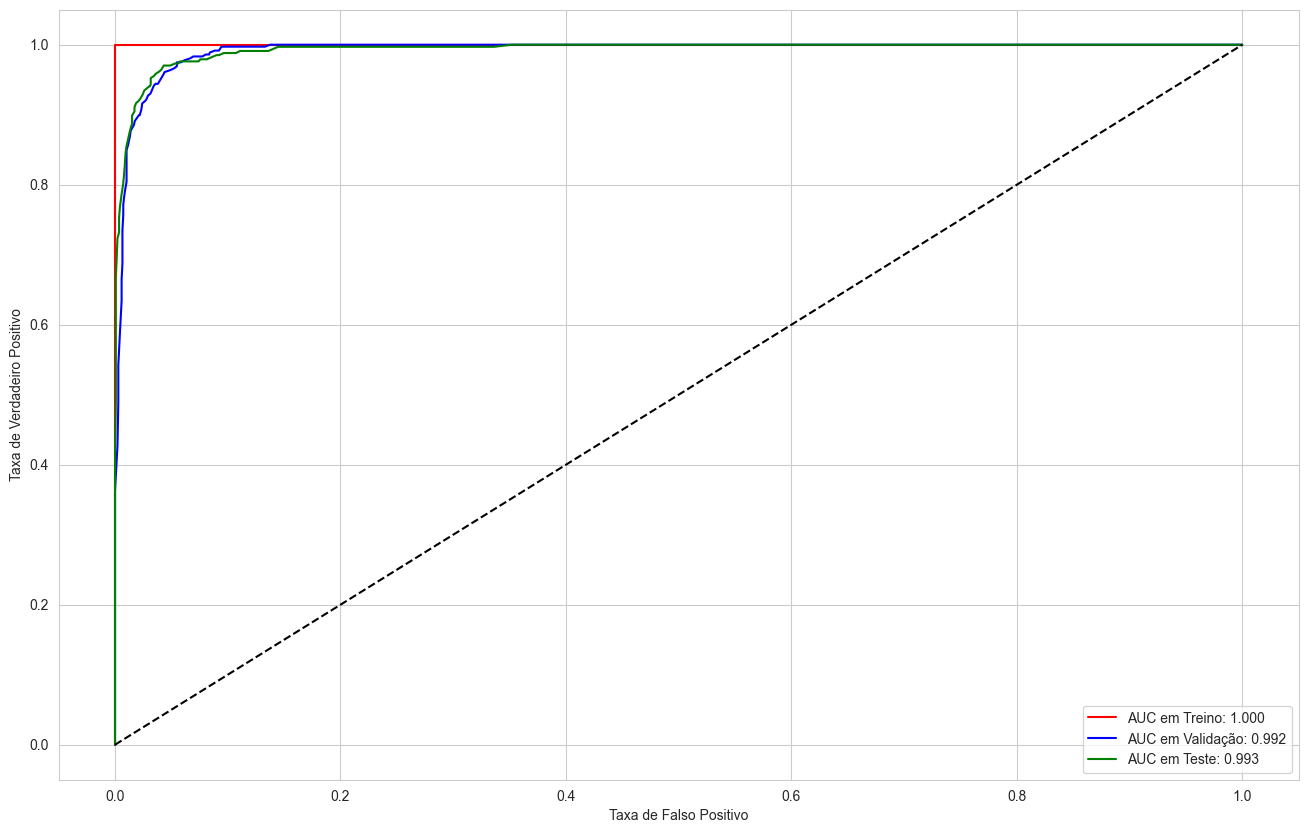

In [29]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Deploy do Modelo
</h2>

<p style='text-align: justify;'>
  ________________________________________

In [30]:
# Carregando dados de um novo cliente
novo_cliente = pd.read_csv('dados/novo_cliente.csv')

In [31]:
novo_cliente.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,42,53,44,31,15,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [32]:
novo_cliente_scaled = scaler.transform(novo_cliente)

In [33]:
novo_cliente_scaled

array([[ 0.24705204,  0.27982607,  0.23682097,  0.17229122,  0.0932867 ,
         0.06672408,  0.03153319,  0.01827377,  0.00054486, -0.02376184,
        -0.06008136, -0.0829618 , -0.08563786, -0.07623014, -0.05563138,
        -0.04671788, -0.04998509, -0.05872126, -0.04167399, -0.03464141,
        -0.05482512, -0.03832046, -0.01803422, -0.00771396, -0.01279569,
        -0.00509202,  0.02850535,  0.06043553,  0.09483571,  0.09420039,
         0.0782324 ,  0.02190432, -0.00042179, -0.02323215,  0.00254206,
         0.03402057,  0.07664505,  0.11677095,  0.13330688,  0.16610254,
         0.17609845,  0.19100513,  0.17885537,  0.19301158,  0.18471206,
         0.17506362,  0.16114208,  0.12122916,  0.06643139,  0.02379123,
         0.01255544, -0.04256907, -0.09502725, -0.13788269, -0.16164688,
        -0.17663389, -0.17463647, -0.16758311, -0.1575675 , -0.12219191,
        -0.08715601, -0.04809413, -0.01094651, -0.02719903, -0.01620676,
        -0.00857351,  0.00776259,  0.0552963 ,  0.0

In [34]:
best_model.predict_proba(novo_cliente_scaled)

array([[1., 0.]])

In [35]:
best_model.predict(novo_cliente_scaled)

array([0], dtype=int64)

<p style='text-align: justify;'>
  ________________________________________
</p>

<h2 style='text-align: justify;'>
  Resultado:
</h2>

<p style='text-align: justify;'>
  De acordo com a previsão do modelo, esse cliente não vai fazer a renovação do seguro.
</p>

<p style='text-align: justify;'>
  ________________________________________